In [2]:
import requests,numpy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [239]:
def get_text_from_elements(elements):
    """Uses list comprehension to parse out the cleaned text strings from a list of 
    elements returned from a BeautifulSoup selection.
    
    Arguments:
        elements {list} -- list of elements returned from a BeautifulSoup selection
    
    Returns:
        list -- list of cleaned text contained within the element list
    """

    return [e.text.strip() for e in elements]

## Princeton Review webscraping

In [240]:
School_Name = []
Enrolled = []
Location = []

In [4]:
for i in range (20):
    url = "https://www.princetonreview.com/college-rankings?rankings=best-382-colleges&page="+str(i+1)
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    #get school name
    school_name = soup.select('h2 > a')
    School_Name += get_text_from_elements(school_name)
    #get enroll number
    enrolled = soup.select('li > span.black-text.bold')
    Enrolled += get_text_from_elements(enrolled)
    #get school location
    temp = soup.select('li > span.black-text')
    location = [item for item in temp if item not in enrolled]
    Location += get_text_from_elements(location)
    
#     if len(School_Name1) > len(Enrolled1):
#         print(i+1)
#         break

In [5]:
print(len(School_Name))
print(len(Enrolled))
print(len(Location))

382
381
382


In [6]:
Enrolled.insert(School_Name.index("Lafayette College"),0)

In [7]:
Schools = pd.DataFrame({"School_Name": School_Name, "Location": Location,"Enrolled": Enrolled})
Schools.to_excel("Schools_yichuny.xlsx")


## Princeton data

In [247]:
princeton = pd.read_excel("data/princeton_clean.xlsx")

In [248]:
princeton.describe()

,School,Enrolled,Country,County,State
count,382,382,382,382,382
unique,382,378,1,297,53
top,San Diego State University,"2,428",USA,New York,NY
freq,1,2,382,8,46


In the Princeton Review dataset, we have 382 individual school from 53 states. Let's double-check what these 53 states are.

In [249]:
import collections
counter=collections.Counter(princeton['State'])
counter

Counter({' AL': 4,
         ' AR': 1,
         ' AZ': 3,
         ' CA': 31,
         ' CO': 5,
         ' CT': 10,
         ' DC': 5,
         ' DE': 1,
         ' FL': 12,
         ' GA': 7,
         ' HI': 1,
         ' IA': 5,
         ' ID': 2,
         ' IL': 11,
         ' IN': 8,
         ' KS': 2,
         ' KY': 6,
         ' LA': 6,
         ' Louisiana': 1,
         ' MA': 28,
         ' MD': 10,
         ' ME': 6,
         ' MI': 6,
         ' MN': 5,
         ' MO': 8,
         ' MS': 2,
         ' MT': 2,
         ' NC': 12,
         ' ND': 1,
         ' NE': 2,
         ' NH': 3,
         ' NJ': 9,
         ' NM': 2,
         ' NV': 1,
         ' NY': 46,
         ' OH': 14,
         ' OK': 2,
         ' ON': 1,
         ' OR': 5,
         ' PA': 29,
         ' QC': 1,
         ' RI': 4,
         ' SC': 5,
         ' SD': 1,
         ' TN': 4,
         ' TX': 13,
         ' UT': 3,
         ' VA': 16,
         ' VT': 6,
         ' WA': 7,
         ' WI': 5,
         ' W

In [250]:
princeton[princeton['State']==' Louisiana']

,School,Enrolled,Country,County,State
42,Centenary College of Louisiana,533,USA,Shreveport,Louisiana


In [251]:
princeton.xs(42)['State'] =  ' LA'

We corrected the state labeling mistake. Now we are wondering what states have the most schools that's considered as "most popular school" by princeton review.

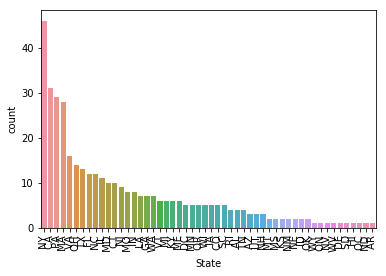

In [252]:
ax = sns.countplot(x="State", data= princeton, order = princeton['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

As we can see on the graph, the top 4 states exceeds all others states and have the most school counts. Now let's take a closer look at these four states.

In [253]:
counter2=collections.Counter(princeton['State'])
most_pop_states = pd.DataFrame(data=counter2.most_common()[:4])
most_pop_states.columns = ['State', 'Count']
most_pop_states

,State,Count
0,NY,46
1,CA,31
2,PA,29
3,MA,28


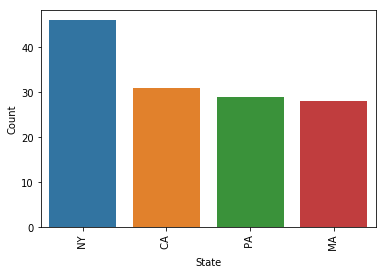

In [254]:
ax = sns.barplot(x="State", y = 'Count', data= most_pop_states)
plt.xticks(rotation=90)
plt.show()

We are also interested in learning about the enrollment of students by states.

In [255]:
princeton['Enrolled'] = princeton['Enrolled'].str.replace(',', '').astype(float) 
##excelent line of code from 
# https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float

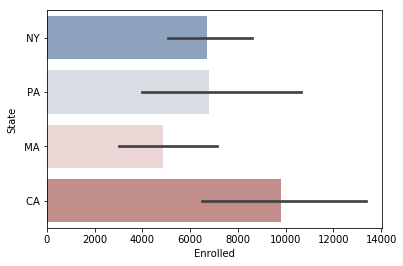

In [256]:
top4_states = princeton.loc[princeton['State'].isin([' NY',' MA', ' PA', ' CA'])]

sns.barplot(x="Enrolled", y="State", data= top4_states,palette="vlag")
plt.show()

As the bar plot suggests, every years, top colleges in California has almost 10,000 students enrolled in the programs.

## Shanghai Data

In [259]:
shanghai = pd.read_excel("data/Shanghai_clean.xlsx")

In [264]:
shanghai_us= shanghai[shanghai['Location']=='USA'].reset_index(drop=True)
len(shanghai_us)

47

For this set of data, we have 47 school records that belong to the USA. For the purpose of this study(sample college search), we will only dive into schools in the United States

In [265]:
with_total_score = shanghai_us[-shanghai_us['Total Score'].isnull()]
with_total_score

,School,Total Score,Papers in Top 20% Journals,Location
0,Massachusetts Institute of Technology (MIT),100.0,92.5,USA
1,Stanford University,92.9,96.7,USA
2,"University of California, Berkeley",82.8,93.4,USA
3,The University of Texas at Austin,80.3,87.4,USA
4,Georgia Institute of Technology,79.8,86.6,USA
5,University of Illinois at Urbana-Champaign,79.4,88.3,USA
6,University of Michigan-Ann Arbor,77.3,88.1,USA
7,Texas A&M; University,76.7,81.2,USA
8,Purdue University - West Lafayette,75.8,81.9,USA
9,"University of California, San Diego",73.8,92.1,USA


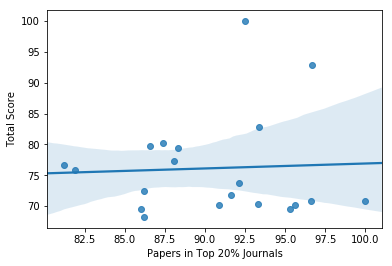

In [266]:
sns.regplot(y="Total Score", x="Papers in Top 20% Journals", data=with_total_score)
plt.show()

It seems the total score given by the website is not directly collerated with papers in top 20% journals. Regardless, all schools on the list have a pretty high rate for "papers in the top 20% journals.

## Niche Data

In [4]:
niche = pd.read_excel("data/Niche.xlsx")

In [229]:
niche_update  = niche[niche["SAT_Higher"].notna()]

In [230]:
niche_update = niche_update.reset_index()
niche_update[:20]

,index,Acceptance Rate,County,State,Price,SAT_Lower,SAT_Higher,School
0,0,0.08,Cambridge,MA,21576,1460,1590.0,Massachusetts Institute of Technology
1,1,0.05,Stanford,CA,16695,1380,1580.0,Stanford University
2,2,0.07,Princeton,NJ,17732,1400,1590.0,Princeton University
3,3,0.26,Atlanta,GA,13340,1320,1500.0,Georgia Institute of Technology
4,4,0.08,Pasadena,CA,26839,1510,1600.0,California Institute of Technology
5,5,0.15,Houston,TX,22061,1410,1570.0,Rice University
6,6,0.06,New Haven,CT,18319,1420,1600.0,Yale University
7,7,0.05,Cambridge,MA,16205,1430,1600.0,Harvard University
8,8,0.11,Durham,NC,19950,1380,1570.0,Duke University
9,9,0.61,Melbourne,FL,31582,1060,1260.0,Florida Institute of Technology


In [208]:
len(niche_update)

430

After dropping schools that does not include SAT score, we have 430 instances to study from.

#### Accptance Rate

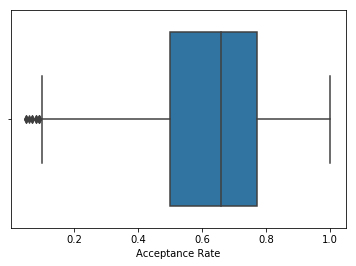

In [216]:
niche_update["Acceptance Rate"]= pd.to_numeric(niche_update["Acceptance Rate"],errors='coerce')
ax = sns.boxplot(x= niche_update['Acceptance Rate'])
plt.show()

#### Price

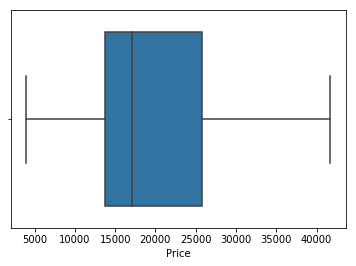

In [218]:
niche_update["Price"] = pd.to_numeric(niche_update["Price"],errors='coerce')
ax = sns.boxplot(x= niche_update['Price'])
plt.show()

### Is Price and Accptance Rate correlated?

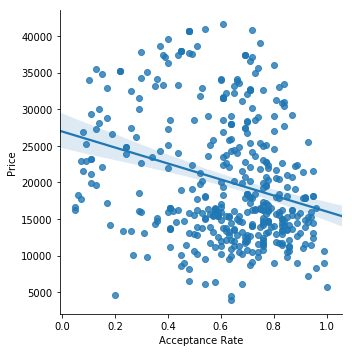

In [223]:
g = sns.lmplot(y="Price", x="Acceptance Rate",size=5, data=niche_update)
plt.show()

Schools with lower Acceptance Rate are more expensive. This graph indicates the more competitive institutions are also more expensive.

#### SAT Score & Acceptance Rate

In [237]:
niche_update["SAT_Lower"] = pd.to_numeric(niche_update["SAT_Lower"],errors='coerce')
niche_update["SAT_Higher"] = pd.to_numeric(niche_update["SAT_Higher"],errors='coerce')


## Merge files - 3 Data Sources

In [257]:
niche_update.head()

,index,Acceptance Rate,County,State,Price,SAT_Lower,SAT_Higher,School
0,0,0.08,Cambridge,MA,21576,1460,1590.0,Massachusetts Institute of Technology
1,1,0.05,Stanford,CA,16695,1380,1580.0,Stanford University
2,2,0.07,Princeton,NJ,17732,1400,1590.0,Princeton University
3,3,0.26,Atlanta,GA,13340,1320,1500.0,Georgia Institute of Technology
4,4,0.08,Pasadena,CA,26839,1510,1600.0,California Institute of Technology


In [258]:
princeton.head()

,School,Enrolled,Country,County,State
0,Agnes Scott College,921.0,USA,Decatur,GA
1,Albion College,1568.0,USA,Albion,MI
2,Alfred University,1960.0,USA,Alfred,NY
3,Allegheny College,1802.0,USA,Meadville,PA
4,American University,8123.0,USA,Washington,DC


In [267]:
shanghai_us.head()

,School,Total Score,Papers in Top 20% Journals,Location
0,Massachusetts Institute of Technology (MIT),100.0,92.5,USA
1,Stanford University,92.9,96.7,USA
2,"University of California, Berkeley",82.8,93.4,USA
3,The University of Texas at Austin,80.3,87.4,USA
4,Georgia Institute of Technology,79.8,86.6,USA


In [268]:
# merged = princeton.merge(shanghai,on = "School", how = 'outer')
# merged.to_excel("Merged.xlsx",index = False)


merged_temp = niche_update.merge(princeton, on = "School", how = 'outer')


In [269]:
merged_temp.head()

,index,Acceptance Rate,County_x,State_x,Price,SAT_Lower,SAT_Higher,School,Enrolled,Country,County_y,State_y
0,0.0,0.08,Cambridge,MA,21576,1460.0,1590.0,Massachusetts Institute of Technology,4547.0,USA,Cambridge,MA
1,1.0,0.05,Stanford,CA,16695,1380.0,1580.0,Stanford University,7062.0,USA,Stanford,CA
2,2.0,0.07,Princeton,NJ,17732,1400.0,1590.0,Princeton University,5394.0,USA,Princeton,NJ
3,3.0,0.26,Atlanta,GA,13340,1320.0,1500.0,Georgia Institute of Technology,15572.0,USA,Atlanta,GA
4,4.0,0.08,Pasadena,CA,26839,1510.0,1600.0,California Institute of Technology,961.0,USA,Pasadena,CA


In [272]:
merged = merged_temp.merge(shanghai_us,on = "School", how = 'outer')
merged.head()

,index,Acceptance Rate,County_x,State_x,Price,SAT_Lower,SAT_Higher,School,Enrolled,Country,County_y,State_y,Total Score,Papers in Top 20% Journals,Location
0,0.0,0.08,Cambridge,MA,21576,1460.0,1590.0,Massachusetts Institute of Technology,4547.0,USA,Cambridge,MA,NaN,NaN,NaN
1,1.0,0.05,Stanford,CA,16695,1380.0,1580.0,Stanford University,7062.0,USA,Stanford,CA,92.9,96.7,USA
2,2.0,0.07,Princeton,NJ,17732,1400.0,1590.0,Princeton University,5394.0,USA,Princeton,NJ,70.9,96.6,USA
3,3.0,0.26,Atlanta,GA,13340,1320.0,1500.0,Georgia Institute of Technology,15572.0,USA,Atlanta,GA,79.8,86.6,USA
4,4.0,0.08,Pasadena,CA,26839,1510.0,1600.0,California Institute of Technology,961.0,USA,Pasadena,CA,69.5,95.3,USA


In [274]:
merged.drop(columns=['Location', 'Country'])

,index,Acceptance Rate,County_x,State_x,Price,SAT_Lower,SAT_Higher,School,Enrolled,County_y,State_y,Total Score,Papers in Top 20% Journals
0,0.0,0.08,Cambridge,MA,21576,1460.0,1590.0,Massachusetts Institute of Technology,4547.0,Cambridge,MA,NaN,NaN
1,1.0,0.05,Stanford,CA,16695,1380.0,1580.0,Stanford University,7062.0,Stanford,CA,92.9,96.7
2,2.0,0.07,Princeton,NJ,17732,1400.0,1590.0,Princeton University,5394.0,Princeton,NJ,70.9,96.6
3,3.0,0.26,Atlanta,GA,13340,1320.0,1500.0,Georgia Institute of Technology,15572.0,Atlanta,GA,79.8,86.6
4,4.0,0.08,Pasadena,CA,26839,1510.0,1600.0,California Institute of Technology,961.0,Pasadena,CA,69.5,95.3
5,5.0,0.15,Houston,TX,22061,1410.0,1570.0,Rice University,102.0,Houston,TX,NaN,94.8
6,6.0,0.06,New Haven,CT,18319,1420.0,1600.0,Yale University,5532.0,New Haven,CT,NaN,NaN
7,7.0,0.05,Cambridge,MA,16205,1430.0,1600.0,Harvard University,NaN,NaN,NaN,70.2,95.6
8,8.0,0.11,Durham,NC,19950,1380.0,1570.0,Duke University,6609.0,Durham,NC,NaN,92.5
9,9.0,0.61,Melbourne,FL,31582,1060.0,1260.0,Florida Institute of Technology,NaN,NaN,NaN,NaN,NaN
